# Importing necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset creation

In [9]:
dataset = {
    "Teacher": [
        "Astrid Aguilar", "Alejandra Cabrera", "Alejandra Cabrera", "Professor Brown", "Jorge Borges",
        "Mishell Reyes", "Paola Novelo", "Jorge Borges", "Mishell Reyes", "Alicia Borges"
    ],
    "Subject": [
        "English I", "English VII", "English IV", "English I", "English IV",
        "English I", "English IV", "English VII", "English I", "English I"
    ],
    "Availability": [
        "3, 4", "9, 10", "7, 8", "3, 4", "7, 8",
        "3, 4", "7, 8", "9, 10", "3, 4", "3, 4"
    ]
}


df = pd.DataFrame(dataset)

In [10]:
df

,Teacher,Subject,Availability
0,Astrid Aguilar,English I,"3, 4"
1,Alejandra Cabrera,English VII,"9, 10"
2,Alejandra Cabrera,English IV,"7, 8"
3,Professor Brown,English I,"3, 4"
4,Jorge Borges,English IV,"7, 8"
5,Mishell Reyes,English I,"3, 4"
6,Paola Novelo,English IV,"7, 8"
7,Jorge Borges,English VII,"9, 10"
8,Mishell Reyes,English I,"3, 4"
9,Alicia Borges,English I,"3, 4"


In [11]:
df.shape

(10, 3)

In [12]:
df.to_csv("teacher's information.csv")

# Main code

<ipython-input-13-4ba16e4ea967>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['Availability'] = english_df['Availability'].apply(lambda x: [int(day) for day in x.split(', ')])


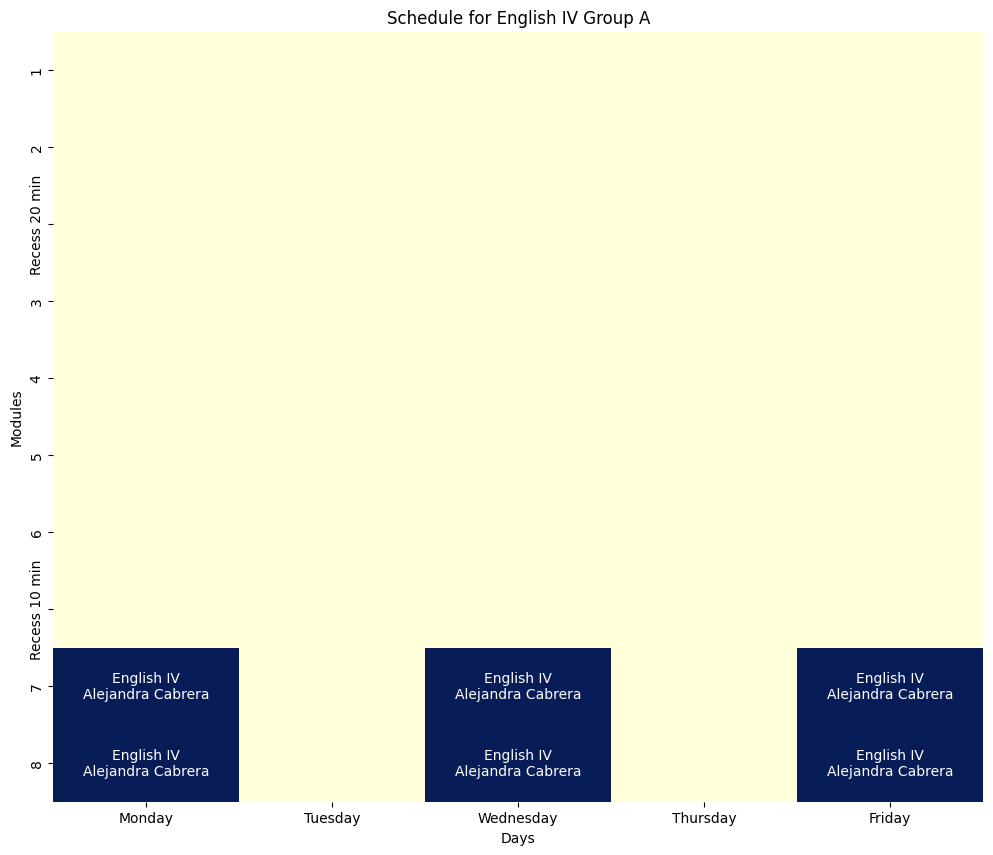

In [13]:
# Filter only English IV subject
english_df = df[df["Subject"] == "English IV"]

# Splitting and converting availability to integers
english_df['Availability'] = english_df['Availability'].apply(lambda x: [int(day) for day in x.split(', ')])

# Exploding the availability data into different rows
english_df = english_df.explode('Availability')

# Days and modules (including recess)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]
modules = [1, 2, 'Recess 20 min', 3, 4, 5, 6, 'Recess 10 min', 7, 8]

# Selecting the first English IV teacher from the list
teacher = english_df['Teacher'].unique()[0]

# Creating a timetable matrix for the English IV class group
timetable = pd.DataFrame(columns=days, index=modules).fillna('')

# Populating the timetable for the selected teacher with both subject and teacher's name
# As English IV classes are only on Monday, Wednesday, and Friday:
class_days = ["Monday", "Wednesday", "Friday"]
for hour in english_df[english_df['Teacher'] == teacher]['Availability']:
    # Map the hour to the corresponding module, considering the recesses
    if hour <= 2:
        module = hour
    elif hour <= 5:
        module = hour + 0
    else:
        module = hour + 0
    # Both values are 0 so as not to shift the modules, which becomes an error

    for day in class_days:
        if module in timetable.index:  # Check if it's not a recess time
            timetable.at[module, day] = 'English IV\n' + teacher

# Plotting the full-week timetable schedule for the English IV class
plt.figure(figsize=(12, 10))
sns.heatmap(timetable != '', annot = timetable, fmt = '', cmap = "YlGnBu", cbar = False)
plt.title("Schedule for English IV Group A")
plt.xlabel("Days")
plt.ylabel("Modules")
plt.show()

<ipython-input-14-c559aead5cea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_df['Availability'] = english_df['Availability'].apply(lambda x: [int(day) for day in x.split(', ')])


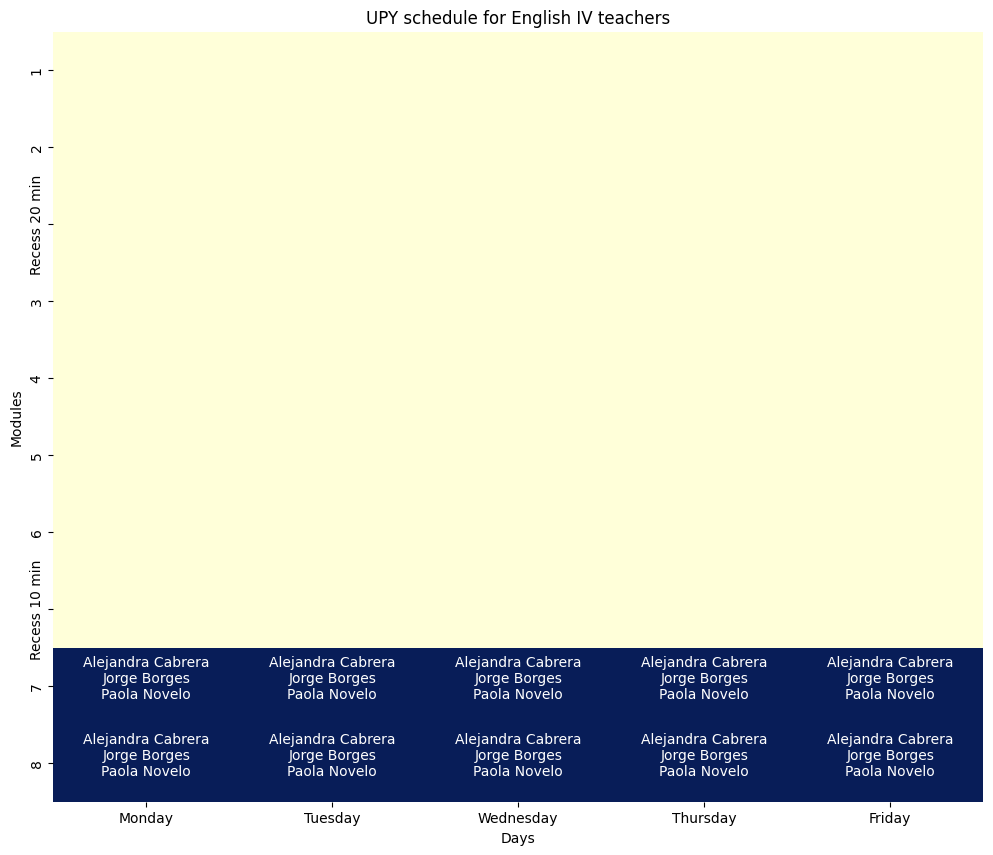

In [14]:
# Filter only English IV subject
english_df = df[df["Subject"] == "English IV"]

# Splitting and converting availability to integers
english_df['Availability'] = english_df['Availability'].apply(lambda x: [int(day) for day in x.split(', ')])

# Exploding the availability data into separate rows
english_df = english_df.explode('Availability')

# Creating a timetable matrix for each day (Monday to Friday) and each module (1-7) including recess
timetable = pd.DataFrame(columns=days, index=modules).fillna('')

# Populate the timetable for each English III teacher, skipping recess times
for teacher in english_df['Teacher'].unique():
    available_hours = english_df[english_df['Teacher'] == teacher]['Availability']
    for hour in available_hours:
        # Map the hour to the corresponding module, considering the recesses
        if hour <= 2:
            module = hour
        elif hour <= 5:
            module = hour + 0  # Shift by one for the first recess
        else:
            module = hour + 0  # Shift by two for both recesses

        for day in days:
            if module in timetable.index:  # Check if it's not a recess time
                timetable.at[module, day] += f'{teacher}\n'

# Replace NaN with empty string for better visualization
timetable.fillna('', inplace=True)

# Plotting the English IV timetable
plt.figure(figsize=(12, 10))
sns.heatmap(timetable != '', annot=timetable, fmt='', cmap="YlGnBu", cbar=False)
plt.title("UPY schedule for English IV teachers")
plt.xlabel("Days")
plt.ylabel("Modules")
plt.show()